<a href="https://colab.research.google.com/github/3angstrom/Machine-Learning/blob/main/Model1_For_SolarRadiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings (action = 'ignore')

Importing Data PV_01

In [2]:
data = pd.read_excel('pv_01.xlsx')

In [10]:
data.head(10)

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
0,1.0,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.558633,0.190752,0.681740,0.965801,0.359087,0.577455,0.172559,0.733785,0.941978,0.000000
1,2.0,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.531501,0.217852,0.600192,0.989859,0.475393,0.545543,0.204424,0.641217,0.979643,0.000000
2,3.0,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.623444,0.126020,0.851167,0.855924,0.472248,0.635529,0.114573,0.875928,0.829663,0.000000
3,4.0,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.669254,0.080266,0.937664,0.741765,0.591015,0.673493,0.076666,0.943093,0.731664,0.035185
4,5.0,0.571429,0.455788,1.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.698923,0.050633,0.974850,0.656581,0.641152,0.701128,0.049073,0.976413,0.651756,0.120988
5,6.0,0.714286,0.256176,0.889960,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.677020,0.072509,0.948921,0.720160,0.634306,0.681408,0.068763,0.954045,0.709385,0.201235
6,7.0,0.857143,0.095371,0.632563,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.673972,0.075553,0.944629,0.728703,0.658522,0.677493,0.072672,0.948766,0.720473,0.004321
7,8.0,1.000000,0.000000,0.270427,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.665792,0.083723,0.932310,0.751213,0.594543,0.671081,0.079075,0.939536,0.738343,0.000000
8,9.0,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.651299,0.098199,0.907709,0.789437,0.548595,0.658273,0.091864,0.918987,0.772855,0.000000
9,10.0,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.567169,0.182227,0.706414,0.955404,0.458441,0.578866,0.171151,0.737686,0.939892,0.000000


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.dtypes

time_idx                            float64
hour_of_day                         float64
hour_of_day_cos                     float64
hour_of_day_sin                     float64
month_of_year                       float64
month_of_year_cos                   float64
month_of_year_sin                   float64
season_of_year                      float64
season_of_year_cos                  float64
season_of_year_sin                  float64
sunposition_thetaZ                  float64
sunposition_solarAzimuth            float64
sunposition_extraTerr               float64
sunposition_solarHeight             float64
clearsky_diffuse                    float64
clearsky_direct                     float64
clearsky_global                     float64
clearsky_diffuse_agg                float64
clearsky_direct_agg                 float64
clearsky_global_agg                 float64
Albedo                              float64
WindComponentUat0                   float64
WindComponentVat0               

In [6]:
data.describe()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
count,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,...,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000
mean,3109.000000,0.499920,0.533149,0.608563,0.544548,0.420717,0.600220,0.548603,0.394155,0.554595,...,0.564245,0.403288,0.628539,0.608671,0.343724,0.573815,0.411037,0.640362,0.597398,0.109715
std,1794.837644,0.327388,0.365148,0.333564,0.320168,0.358962,0.334571,0.378155,0.385151,0.391409,...,0.230603,0.322571,0.362625,0.300345,0.153723,0.232721,0.328869,0.360847,0.301061,0.178543
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1555.000000,0.142857,0.256176,0.270427,0.272727,0.068148,0.258819,0.333333,0.000000,0.000000,...,0.387985,0.120118,0.290335,0.378777,0.237028,0.398749,0.118401,0.322074,0.366889,0.000000
50%,3109.000000,0.428571,0.661157,0.632563,0.545455,0.377014,0.707107,0.666667,0.171573,0.707107,...,0.611767,0.292992,0.772748,0.652867,0.331004,0.624248,0.317959,0.790428,0.644975,0.008025
75%,4663.000000,0.714286,0.957824,0.889960,0.818182,0.762999,0.866025,1.000000,0.585786,0.707107,...,0.731942,0.646943,0.949839,0.881010,0.436570,0.740582,0.704234,0.953910,0.862743,0.148354
max,6217.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.834568


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   time_idx                          6217 non-null   float64
 1   hour_of_day                       6217 non-null   float64
 2   hour_of_day_cos                   6217 non-null   float64
 3   hour_of_day_sin                   6217 non-null   float64
 4   month_of_year                     6217 non-null   float64
 5   month_of_year_cos                 6217 non-null   float64
 6   month_of_year_sin                 6217 non-null   float64
 7   season_of_year                    6217 non-null   float64
 8   season_of_year_cos                6217 non-null   float64
 9   season_of_year_sin                6217 non-null   float64
 10  sunposition_thetaZ                6217 non-null   float64
 11  sunposition_solarAzimuth          6217 non-null   float64
 12  sunpos

In [11]:
data['power_normed'].max()

0.83456790123457

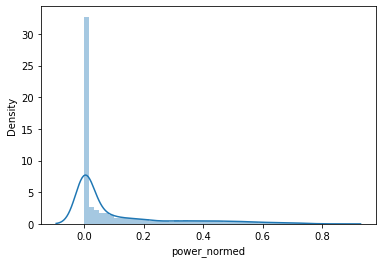

In [13]:
sns.distplot(data['power_normed'])

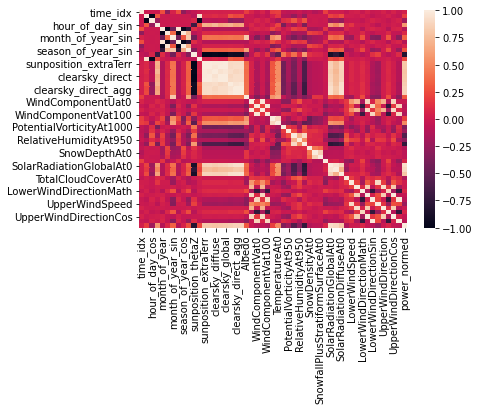

In [18]:
sns.heatmap(data.corr())

In [20]:
data['season_of_year_cos'].value_counts()

0.000000    1944
0.171573    1472
0.585786    1456
1.000000    1345
Name: season_of_year_cos, dtype: int64

In [22]:
data['power_normed'].value_counts()

0.000000    2534
0.000206      68
0.000412      39
0.000617      34
0.000823      26
            ... 
0.656379       1
0.326749       1
0.330041       1
0.358230       1
0.059053       1
Name: power_normed, Length: 1786, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

Y = data['power_normed']
X = scaler.fit_transform(data.drop(columns = ['power_normed']))
X = pd.DataFrame(data = X, columns = data.drop(columns=['power_normed']).columns)
X.head()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindSpeed,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin
0,-1.731772,-1.527116,1.278627,-1.824571,1.138692,-1.123844,-1.020498,1.193777,-1.023459,-1.417033,...,-0.008809,-0.024337,-0.658935,0.146725,1.189159,0.099947,0.015642,-0.725202,0.258919,1.144643
1,-1.731215,-1.090727,1.163113,-0.627309,1.138692,-1.123844,-1.020498,1.193777,-1.023459,-1.417033,...,0.701545,-0.142007,-0.574916,-0.078176,1.269266,0.856603,-0.121497,-0.628303,0.002368,1.269762
2,-1.730658,-0.654338,0.835697,0.371714,1.138692,-1.123844,-1.020498,1.193777,-1.023459,-1.417033,...,0.778736,0.256734,-0.859627,0.613985,0.823294,0.836140,0.265203,-0.901536,0.652866,0.771551
3,-1.730101,-0.217949,0.350592,1.007082,1.138692,-1.123844,-1.020498,1.193777,-1.023459,-1.417033,...,1.936950,0.455401,-1.001480,0.852534,0.443172,1.608802,0.428349,-1.016810,0.839014,0.446012
4,-1.729543,0.218440,-0.211879,1.173591,1.138692,-1.123844,-1.020498,1.193777,-1.023459,-1.417033,...,2.423835,0.584069,-1.093352,0.955090,0.159527,1.934982,0.547104,-1.100720,0.931360,0.180571


In [26]:
X.corr()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindSpeed,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin
time_idx,1.000000,0.000851,-0.000909,-0.000134,0.261392,-0.281574,0.061418,0.263223,-0.287368,-0.110595,...,0.030091,0.043393,-0.022859,0.053160,-0.022527,-0.005260,0.047534,-0.015246,0.054453,-0.023055
hour_of_day,0.000851,1.000000,-0.990969,0.293714,0.000418,-0.000396,0.000251,0.000356,-0.000386,-0.000096,...,0.017951,0.006986,0.045673,-0.007495,-0.056183,-0.019779,0.004205,0.041390,-0.011488,-0.049175
hour_of_day_cos,-0.000909,-0.990969,1.000000,-0.237019,-0.000350,0.000332,-0.000210,-0.000298,0.000324,0.000080,...,-0.012729,-0.008074,-0.049793,0.008647,0.061799,0.018182,-0.006373,-0.045857,0.012918,0.054495
hour_of_day_sin,-0.000134,0.293714,-0.237019,1.000000,0.000499,-0.000474,0.000300,0.000426,-0.000462,-0.000114,...,0.152585,0.018762,0.008705,0.035130,-0.012478,-0.078563,0.009032,-0.012728,0.030868,0.005707
month_of_year,0.261392,0.000418,-0.000350,0.000499,1.000000,-0.991000,-0.438602,0.973367,-0.956108,-0.762803,...,0.012822,0.004539,-0.106556,0.044388,0.075703,0.033493,0.012569,-0.107283,0.052337,0.067604
month_of_year_cos,-0.281574,-0.000396,0.000332,-0.000474,-0.991000,1.000000,0.374574,-0.975549,0.972307,0.730727,...,0.014407,0.005248,0.092383,-0.029407,-0.061621,-0.000899,-0.002415,0.092276,-0.036776,-0.054675
month_of_year_sin,0.061418,0.000251,-0.000210,0.000300,-0.438602,0.374574,1.000000,-0.415336,0.283600,0.820100,...,-0.237849,0.030471,0.278424,-0.038234,-0.314820,-0.342426,0.007419,0.295376,-0.065719,-0.309767
season_of_year,0.263223,0.000356,-0.000298,0.000426,0.973367,-0.975549,-0.415336,1.000000,-0.984886,-0.774194,...,-0.003531,-0.016309,-0.112219,0.022868,0.081105,0.015271,-0.006746,-0.114625,0.032179,0.074231
season_of_year_cos,-0.287368,-0.000386,0.000324,-0.000462,-0.956108,0.972307,0.283600,-0.984886,1.000000,0.665405,...,0.035229,0.012806,0.078815,-0.020921,-0.038142,0.030977,0.007187,0.077557,-0.026113,-0.031494
season_of_year_sin,-0.110595,-0.000096,0.000080,-0.000114,-0.762803,0.730727,0.820100,-0.774194,0.665405,1.000000,...,-0.118131,0.054655,0.238938,-0.006255,-0.253784,-0.194667,0.029359,0.252279,-0.030910,-0.248870


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range (vif_data.shape[1])], index = vif_data.columns)
VIF

time_idx                            1.449317e+00
hour_of_day                         1.722490e+02
hour_of_day_cos                     1.721045e+02
hour_of_day_sin                     7.129959e+00
month_of_year                       1.435529e+02
month_of_year_cos                   1.704670e+02
month_of_year_sin                   1.534085e+01
season_of_year                      4.693726e+02
season_of_year_cos                  3.567394e+02
season_of_year_sin                  3.907058e+01
sunposition_thetaZ                  1.193234e+06
sunposition_solarAzimuth            2.122042e+01
sunposition_extraTerr               1.951229e+03
sunposition_solarHeight             2.635990e+05
clearsky_diffuse                    8.363584e+05
clearsky_direct                     8.386289e+05
clearsky_global                     1.860706e+06
clearsky_diffuse_agg                1.823445e+06
clearsky_direct_agg                 5.537378e+05
clearsky_global_agg                 1.028403e+06
Albedo              

In [30]:
VIF[VIF == VIF.max()].index[0]

'clearsky_global'

In [37]:
def mc_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
  if vif.max() > 5:
    print(vif[vif==vif.max()].index[0], "has been removed")
    data = data.drop(columns=[vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No multicollinearity Present anymore')
    return data

In [38]:
for i in range(8):
  vif_data = mc_remover(vif_data)
vif_data.head()

clearsky_diffuse has been removed
LowerWindSpeed has been removed
sunposition_solarAzimuth has been removed
Albedo has been removed
RelativeHumidityAt0 has been removed
UpperWindDirectionCos has been removed
season_of_year_sin has been removed
LowerWindDirection has been removed
clearsky_direct has been removed
WindComponentVat0 has been removed


,time_idx,hour_of_day,hour_of_day_sin,month_of_year_sin,season_of_year_cos,WindComponentUat0,DewpointTemperatureAt0,PotentialVorticityAt1000,PotentialVorticityAt950,RelativeHumidityAt1000,...,SnowfallPlusStratiformSurfaceAt0,SurfacePressureAt0,SolarRadiationDirectAt0,SolarRadiationDiffuseAt0,TotalCloudCoverAt0,LowerWindDirectionMath,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionSin
0,-1.731772,-1.527116,-1.824571,-1.020498,-1.023459,-0.002680,0.476417,-0.415256,-0.568885,1.011605,...,-0.174676,-1.624707,-0.534546,-0.726043,0.829834,-0.658935,0.099947,0.015642,-0.725202,1.144643
1,-1.731215,-1.090727,-0.627309,-1.020498,-1.023459,-0.114536,0.521554,-0.266085,0.072952,0.947285,...,-0.174676,-2.177294,-0.534546,-0.726043,0.913718,-0.574916,0.856603,-0.121497,-0.628303,1.269762
2,-1.730658,-0.654338,0.371714,-1.020498,-1.023459,0.734287,0.094371,0.966286,0.041750,0.593525,...,-0.174676,-2.180008,-0.534546,-0.726043,0.913718,-0.859627,0.836140,0.265203,-0.901536,0.771551
3,-1.730101,-0.217949,1.007082,-1.020498,-1.023459,1.626288,0.101638,-0.349727,-0.386014,0.529205,...,-0.174676,-2.066083,-0.505231,-0.124118,0.850805,-1.001480,1.608802,0.428349,-1.016810,0.446012
4,-1.729543,0.218440,1.173591,-1.020498,-1.023459,2.076750,-0.151365,-0.843420,-0.528426,-0.017515,...,-0.174676,-1.981142,0.284077,0.641969,0.116820,-1.093352,1.934982,0.547104,-1.100720,0.180571


In [39]:
X = vif_data

In [40]:
Y = data['power_normed']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4973, 23), (1244, 23), (4973,), (1244,))

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [44]:
lr.coef_

array([ 1.77859571e-03, -3.02760617e-03,  7.92563824e-03, -5.45703392e-03,
       -6.21301680e-04, -1.09824500e-03, -4.41743178e-03, -1.31122835e-05,
       -4.44106079e-03, -1.20836224e-03, -1.54833678e-03, -1.08586296e-03,
       -3.05888957e-03,  2.42528096e-03,  2.59972543e-03,  1.11515419e-01,
        6.20853494e-02, -2.17434219e-03,  9.79736564e-05, -4.89124469e-03,
        7.80056592e-04,  2.64640417e-04,  6.21429018e-03])

In [45]:
predictions = lr.predict(x_test)
lr.score(x_test, y_test)

0.872642808736831

In [50]:
residuals = predictions-y_test

In [51]:
residual_table = pd.DataFrame({'residuals': residuals,
                               'predictions': predictions})

In [52]:
residual_table = residual_table.sort_values(by='predictions')

In [53]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

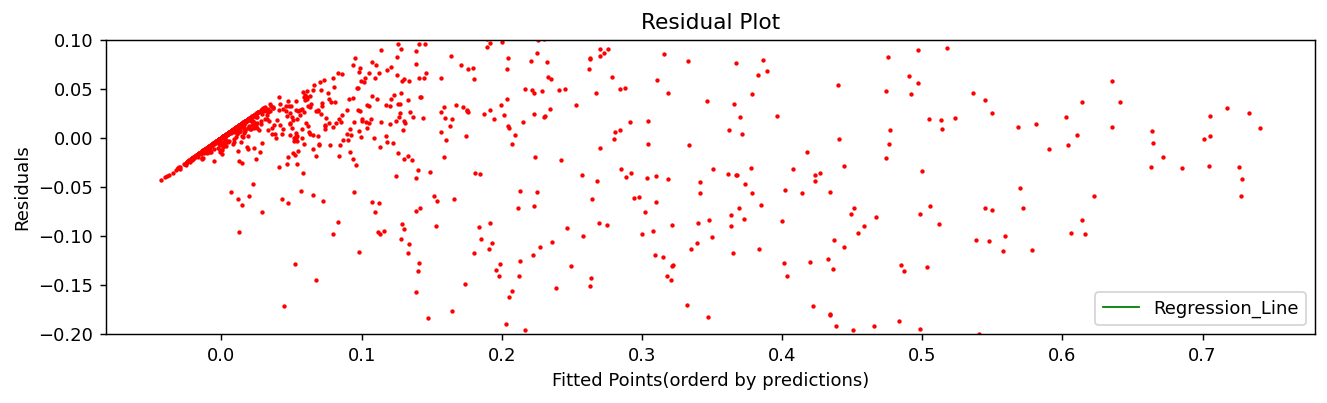

In [58]:
plt.figure(dpi=130, figsize = (12, 3))
plt.scatter(residual_table['predictions'], residual_table['residuals'], color= 'red', s=2)
plt.plot(z, k, color='green', linewidth = 1, label='Regression_Line')
plt.ylim(-0.2, 0.1)
plt.xlabel('Fitted Points(orderd by predictions)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

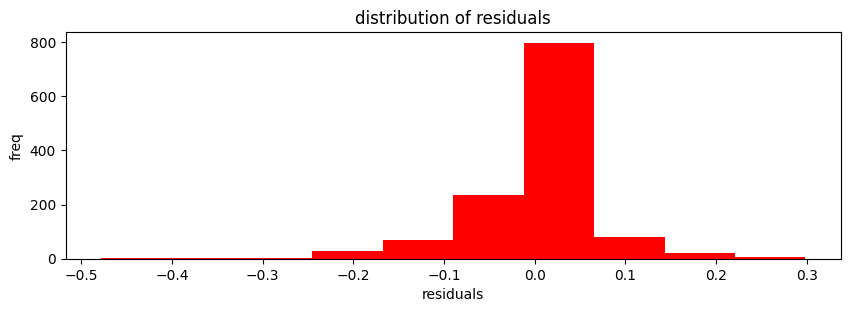

In [59]:
plt.figure(dpi = 100, figsize = (10, 3))
plt.hist(residual_table['residuals'], color = 'red')
plt.xlabel('residuals')
plt.ylabel('freq')
plt.title('distribution of residuals')
plt.show()

In [60]:
coefficients_table = pd.DataFrame({'columns':x_train.columns,
                                   'coefficients':lr.coef_})

coefficients_table = coefficients_table.sort_values(by='coefficients')

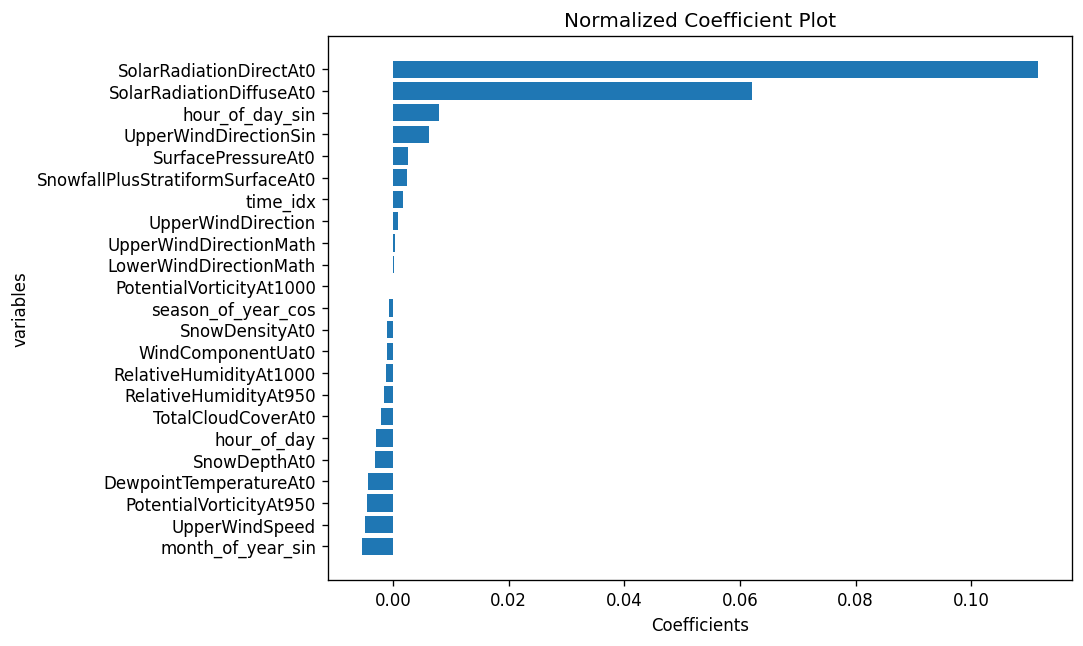

In [61]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficients_table['columns']
y = coefficients_table['coefficients']
plt.barh(x, y)
plt.xlabel('Coefficients')
plt.ylabel('variables')
plt.title('Normalized Coefficient Plot')
plt.show()